The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:




*   **CRIM** - per capita crime rate by town
*   **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

*   **INDUS** - proportion of non-retail business acres per town.

*   **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

*   **NOX** - nitric oxides concentration (parts per 10 million)

*   **RM** - average number of rooms per dwelling

*   **AGE** - proportion of owner-occupied units built prior to 1940

*   **DIS** - weighted distances to five Boston employment centres

*   **RAD** - index of accessibility to radial highways

*   **TAX** - full-value property-tax rate per $10,000

*   **PTRATIO** - pupil-teacher ratio by town

*   **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


*   **LSTAT** - % lower status of the population

*   **MEDV** - Median value of owner-occupied homes in $1000's








**1. Importing the Libraries**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

**2.Importing Datasets**

In [29]:
dataset=pd.read_csv('HousingData.csv')

**3.EDA for dataset**

In [30]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3,222,18.70,396.90,NaN,36.20


In [31]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06,0.00,11.93,0.00,0.57,6.59,69.10,2.48,1,273,21.00,391.99,NaN,22.40
502,0.05,0.00,11.93,0.00,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0.00,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0.00,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00
505,0.05,0.00,11.93,0.00,0.57,6.03,NaN,2.50,1,273,21.00,396.90,7.88,11.90


In [32]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [33]:
dataset.shape

(506, 14)

In [34]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.00,3.61,8.72,0.01,0.08,0.25,3.56,88.98
ZN,486.00,11.21,23.39,0.00,0.00,0.00,12.50,100.00
INDUS,486.00,11.08,6.84,0.46,5.19,9.69,18.10,27.74
CHAS,486.00,0.07,0.26,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.39,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,486.00,68.52,28.00,2.90,45.17,76.80,93.97,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


**4.Checking for Missing data**

In [35]:
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: True


In [36]:
dataset=dataset.fillna(dataset.mean())
print(str('Any missing data or NaN in the dataset:'),dataset.isnull().values.any())

Any missing data or NaN in the dataset: False


In [37]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**5.Correlation between Variables**

         CRIM    ZN  INDUS  CHAS   NOX    RM   AGE   DIS   RAD   TAX  PTRATIO  \
CRIM     1.00 -0.18   0.39 -0.05  0.41 -0.22  0.34 -0.37  0.61  0.57     0.27   
ZN      -0.18  1.00  -0.51 -0.04 -0.50  0.32 -0.54  0.64 -0.31 -0.31    -0.40   
INDUS    0.39 -0.51   1.00  0.06  0.74 -0.38  0.61 -0.70  0.59  0.72     0.38   
CHAS    -0.05 -0.04   0.06  1.00  0.07  0.10  0.08 -0.09  0.00 -0.03    -0.11   
NOX      0.41 -0.50   0.74  0.07  1.00 -0.30  0.71 -0.77  0.61  0.67     0.19   
RM      -0.22  0.32  -0.38  0.10 -0.30  1.00 -0.24  0.21 -0.21 -0.29    -0.36   
AGE      0.34 -0.54   0.61  0.08  0.71 -0.24  1.00 -0.72  0.45  0.50     0.26   
DIS     -0.37  0.64  -0.70 -0.09 -0.77  0.21 -0.72  1.00 -0.49 -0.53    -0.23   
RAD      0.61 -0.31   0.59  0.00  0.61 -0.21  0.45 -0.49  1.00  0.91     0.46   
TAX      0.57 -0.31   0.72 -0.03  0.67 -0.29  0.50 -0.53  0.91  1.00     0.46   
PTRATIO  0.27 -0.40   0.38 -0.11  0.19 -0.36  0.26 -0.23  0.46  0.46     1.00   
B       -0.37  0.17  -0.35  

<Axes: >

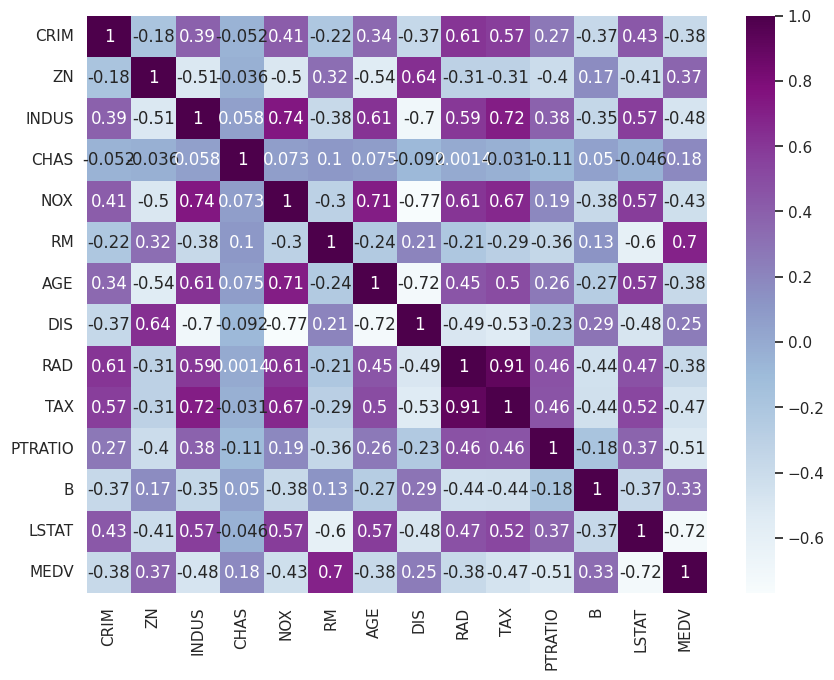

In [38]:
corr_var=dataset.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

By looking at the correlation matrix we can see that **RM** has a strong positive correlation with **MEDV (0.7)**, **PTRATIO** which has negative correlation with **MEDV(-0.51)** and **LSTAT** has a high negative correlation with **MEDV (-0.72)**.

**6.Dependent and Independent Variable**

In [39]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
#print(X)
#print(y)

**7.Splitting the dataset**

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (337, 13)
y_train: (337,)
X_test: (169, 13)
y_test: (169,)


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [43]:
print('Explained variation: {}'.format(pca.explained_variance_ratio_))

Explained variation: [0.47217721 0.10694978 0.09603822 0.06927484 0.06515412 0.04860002
 0.03947911 0.03189555 0.02110436 0.01778503 0.01416238 0.0128819
 0.00449749]


# Modelling

In [44]:
# importing the dependencies
!pip install pyforest

In [45]:
!pip install lazypredict

In [46]:
#by importing pyforest we can generate almost 40 regression model
import pyforest
from lazypredict.Supervised import LazyRegressor
regressions = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = regressions.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 42/42 [00:05<00:00,  7.61it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1474
[LightGBM] [Info] Number of data points in the train set: 337, number of used features: 13
[LightGBM] [Info] Start training from score 22.335312
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai